# 逻辑回归
逻辑回归是一种机器学习分类算法，用于预测分类因变量的概率。在逻辑回归中，因变量是一个二进制变量，包含编码为1的数据(是、成功等)。)或0(否、失败等。)。换句话说，逻辑回归模型预测P(Y=1)是x的函数

## 逻辑回归假设
二元逻辑回归要求因变量是二元的。对于二元回归，因变量的因子水平1应该代表期望的结果。应该只包括有意义的变量。自变量应该相互独立。也就是说，模型应该具有很少或没有多重共线性。自变量与对数赔率线性相关。逻辑回归需要相当大的样本量。记住上面的假设，让我们看看我们的数据集。

## 数据
该数据集来自UCI机器学习知识库，它与一家葡萄牙银行机构的直接营销活动(电话)相关。分类目标是预测客户是否会认购(1/0)定期存款(变量y)。数据集可以从这里下载。http://archive.ics.uci.edu/ml/machine-learning-databases/00222/

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

数据集提供银行客户的信息。它包括4521条记录和17个字段。

In [2]:
data=pd.read_csv('bank.csv',delimiter=';')
data=data.dropna()
print(data.shape)
print(list(data.columns))

data.head()

(4521, 17)
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


**输入变量**

- age（ 数字）
- job：工作类型（job， 分类：“管理员”，“蓝领”，“企业家”，“女佣”，“管理”，“退休”，“自营职业”，“服务”，“学生”，“技师” “，”失业“，”未知“）
- marital：婚姻状况（分类：“离婚”，“已婚”，“单身”，“未知”）
- education（分类：'primary', 'secondary', 'tertiary', 'unknown'）
- default：违约信用？ （分类：“不”，“是”，“未知”）
- balance；
- housing：有住房贷款吗？ （分类：“不”，“是”，“未知”）
- loan：有个人贷款吗？ （分类：“不”，“是”，“未知”）
- contact：联系沟通类型（分类：“蜂窝”，“电话”）
- day；最后一天联系的日期（1-31）
- month：最后一个月的联系月份（分类：“jan”，“feb”，“mar”，...，“nov”，“dec”）
- duration:：上次联系持续时间，以秒为单位（数字）。重要提示：此属性会严重影响输出目标（例如，如果持续时间= 0，则y ='否'）。在执行呼叫之前不知道持续时间，也就是说，在呼叫结束之后，y显然是已知的。因此，此输入仅应包括在基准目的中，如果打算采用现实的预测模型，则应将其丢弃
- campaign:：此广告系列期间和此客户端执行的联系人数量（数字，包括最后一次联系）
- pdays：从上一个广告系列上次联系客户端之后经过的天数（数字; 999表示之前未联系客户）
- previous：此广告系列之前和此客户端之间执行的联系人数量（数字）
- poutcome：上一次营销活动的结果（分类：“失败”，“不存在”，“成功”）

## 预测变量(预期目标):
y-客户是否已预订定期存款？(字符串:“yes”表示“是”，“no”表示“否”)数据集的教育列有许多类别，我们需要减少类别以获得更好的建模。教育栏目有以下几类:

In [3]:
data['education'].unique()

array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object)

## 数据搜索

我们可以先看一下属性为y的这一列的信息

In [4]:
data['y'].value_counts()

no     4000
yes     521
Name: y, dtype: int64

可视化显示

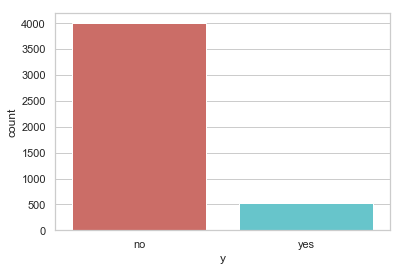

<Figure size 432x288 with 0 Axes>

In [5]:
sns.countplot(x='y',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

In [6]:
count_no_sub = len(data[data['y']=='no'])
count_sub = len(data[data['y']=='yes'])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of no subscription is", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of subscription", pct_of_sub*100)

percentage of no subscription is 88.47600088476001
percentage of subscription 11.523999115239992


我们的类是不平衡的，不订阅和订阅的比例是89:11。 在我们继续平衡课程之前，让我们再做一些探索。

In [7]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
yes,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211


**观察：**

购买定期存款的客户的平均年龄高于未购买定期存款的客户的平均年龄。
对于购买它的客户来说，pdays（自上次联系客户以来的日子）可以理解为较低。 pdays越低，最后一次通话的记忆越好，因此销售的机会就越大。
令人惊讶的是，购买定期存款的客户的广告系列（当前广告系列期间的联系人或通话次数）较低。
我们可以计算其他分类变量（如教育和婚姻状况）的分类方法，以更详细地了解我们的数据。

我们可以计算其他分类变量（如教育和婚姻状况）的分类方法，以更详细地了解我们的数据。

In [8]:
data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous
job,,,,,,,
admin.,39.682008,1226.736402,16.324268,234.669456,2.631799,49.993724,0.644351
blue-collar,40.156448,1085.161734,15.482030,278.161734,2.846723,41.590909,0.493658
entrepreneur,42.011905,1645.125000,15.255952,285.476190,2.589286,32.273810,0.428571
housemaid,47.339286,2083.803571,15.294643,292.633929,2.500000,26.401786,0.357143
management,40.540764,1766.928793,16.254902,260.536636,2.973168,40.968008,0.549020
retired,61.869565,2319.191304,15.556522,285.656522,2.465217,35.073913,0.591304
self-employed,41.453552,1392.409836,16.180328,264.125683,3.278689,28.256831,0.590164
services,38.570743,1103.956835,15.515588,262.486811,2.822542,36.371703,0.443645
student,26.821429,1543.821429,16.392857,248.690476,2.392857,45.714286,0.964286


In [9]:
data.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous
marital,,,,,,,
divorced,45.475379,1122.390152,15.753788,279.232955,2.604167,38.827652,0.439394
married,43.454415,1463.195567,15.905971,256.528781,2.847336,38.466929,0.519128
single,33.927258,1460.414716,16.008361,274.601171,2.751672,43.220736,0.642977


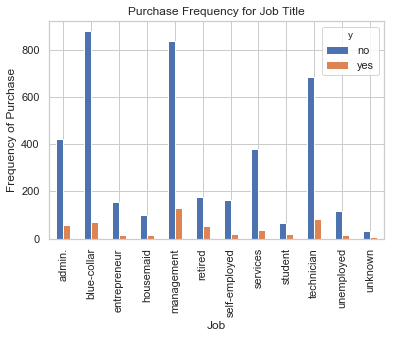

In [10]:
%matplotlib inline
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
plt.savefig('purchase_fre_job')

购买存款的频率在很大程度上取决于职位。 因此，职位可以是结果变量的良好预测因子。

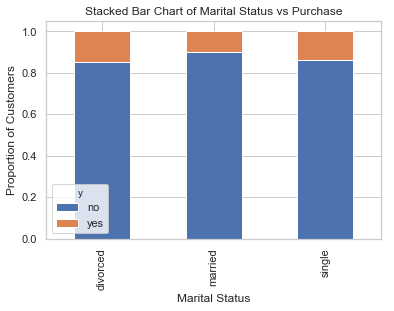

In [11]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

可以看到各种婚姻状态对是否购买的影响不大，所以婚姻状态不适合做影响因子。

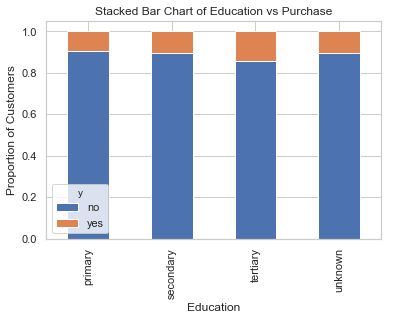

In [12]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

教育情况似乎可以作为一个预测因子，但是个人感觉不是特别重要

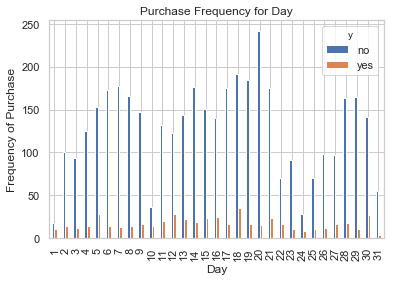

In [13]:
pd.crosstab(data.day,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day')
plt.xlabel('Day')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_day_bar')

日期可以是一个良好的预测分子。

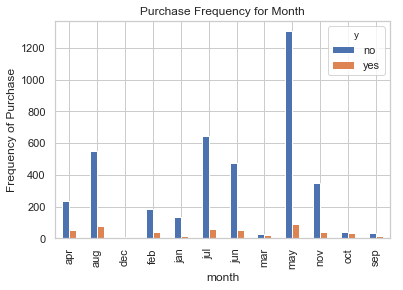

In [14]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_month_bar')

月份也可以是一个很好的预测因子

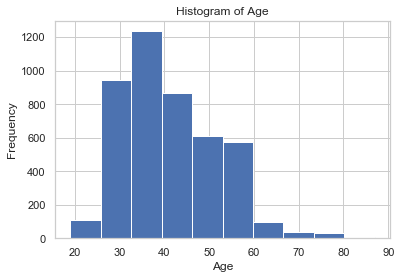

In [15]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

该数据集中银行的大多数客户的年龄范围为30-40。

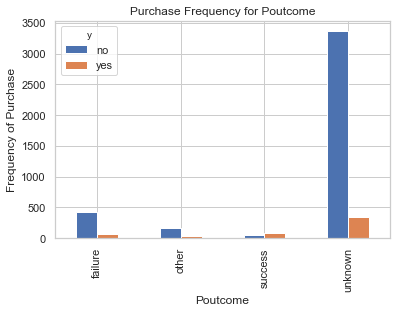

In [16]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

Poutcome似乎是结果变量的良好预测指标。

## 创建虚拟变量
这是只有两个值的变量，1和0。

In [17]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','day','poutcome']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['job','marital','education','default','housing','loan','contact','month','day','poutcome']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [18]:
data_final=data[to_keep]
data_final.columns.values

array(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'day_7',
       'day_8', 'day_9', 'day_10', 'day_11', 'day_12', 'day_13', 'day_14',
       'day_15', 'day_16', 'day_17', 'day_18', 'day_19',

## 使用SMOTE进行过采样（Over-sampling）
创建我们的训练数据后，我将使用SMOTE算法（合成少数过采样技术, Synthetic Minority Oversampling Technique）对未订阅进行上采样(up-sample)。 在高层次上，SMOTE：

通过从次要类（无订阅）创建合成样本而不是创建副本来工作。
随机选择一个k-最近邻居并使用它来创建一个类似但随机调整的新观察结果。
我们将在Python中实现SMOTE。

In [19]:
# 把自变量和因变量分离
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
# 测试数据的输入和真实值
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']=='no']))
print("Number of subscription",len(os_data_y[os_data_y['y']=='yes']))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='no'])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']=='yes'])/len(os_data_X))

length of oversampled data is  5620
Number of no subscription in oversampled data 2810
Number of subscription 2810
Proportion of no subscription data in oversampled data is  0.5
Proportion of subscription data in oversampled data is  0.5


现在我们拥有完美平衡的数据！ 您可能已经注意到我仅对训练数据进行了过采样，因为仅通过对训练数据进行过采样，测试数据中没有任何信息用于创建合成观测，因此，没有信息会从测试数据流入模型训练。

## 递归特征消除（Recursive Feature Elimination）
递归特征消除（RFE）基于重复构建模型并选择最佳或最差执行特征，将该特征置于一边然后用其余特征重复该过程的想法。 应用此过程，直到数据集中的所有要素都用完为止。 RFE的目标是通过递归地考虑越来越小的特征集来选择特征。

In [20]:
data_finadal_vars = data_final.columns.values.tolist()
y=['y']
X=[i for i in data_finadal_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 16)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


d:\studyapp\anaconda\envs\gluon\lib\site-packages\sklearn\utils\validation.py:71: FutureWarning: Pass n_features_to_select=16 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
d:\studyapp\anaconda\envs\gluon\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
d:\studyapp\anaconda\envs\gluon\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterati

[False False False False False False False  True False False False False
 False False False False False False  True  True  True  True  True  True
  True False False  True  True False False  True  True  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False  True  True False  True]
[63 66 64 60 65 62  2  1  5  6  9 11  8  3 10  4  7 12  1  1  1  1  1  1
  1 57 61  1  1 14 13  1  1  1 23 17 28 22 16 18 21 53 20 19 54 27 55 36
 45 30 39 35 32 33 43 58 40 51 49 34 46 44 31 48 29 15 37 41 42 56 50 38
 26 47 24 52 25  1  1 59  1]


把为true的属性选出来
RFE帮助我们选择了以下特征：'job_blue-collar', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'housing_no', 'housing_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_unknown'。

根据support_矩阵把为ture的属性值选出来。

In [22]:
temp = rfe.support_
cols=[] 
for i in range(len(temp)):
    if temp[i] == True:
        cols.append(X[i])

print(cols)
X=os_data_X[cols]
y=os_data_y['y']

['job_blue-collar', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'housing_no', 'housing_yes', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_unknown']


## 实现模型 

In [30]:
# 先把数据转成0，1
Y =[]
for t in y:
    if t =='yes':
        Y.append(1)
    else:
        Y.append(0)
import statsmodels.api as sm
logit_model=sm.Logit(Y,X.astype(int))
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.520564
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.249    
Dependent Variable:   y                 AIC:               5883.1354
Date:                 2020-08-27 16:01  BIC:               5989.2808
No. Observations:     5620              Log-Likelihood:    -2925.6  
Df Model:             15                LL-Null:           -3895.5  
Df Residuals:         5604              LLR p-value:       0.0000   
Converged:            1.0000            Scale:             1.0000   
No. Iterations:       7.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
job_blue-collar     -1.1933   0.1389  -8.5901 0.0000 -1.4656 -0.9210
marital_divorced    -1.4593 

大多数变量的p值小于0.05，除了housing_yes，因此，我们将删除它。

In [31]:
cols = ['job_blue-collar', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'housing_no', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'poutcome_failure', 'poutcome_other', 'poutcome_unknown']
X=os_data_X[cols]
y=os_data_y['y']
Y =[]
for t in y:
    if t =='yes':
        Y.append(1)
    else:
        Y.append(0)
logit_model=sm.Logit(Y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.520588
         Iterations 7
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.249    
Dependent Variable:   y                 AIC:               5881.4087
Date:                 2020-08-27 16:04  BIC:               5980.9200
No. Observations:     5620              Log-Likelihood:    -2925.7  
Df Model:             14                LL-Null:           -3895.5  
Df Residuals:         5605              LLR p-value:       0.0000   
Converged:            1.0000            Scale:             1.0000   
No. Iterations:       7.0000                                        
--------------------------------------------------------------------
                     Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
--------------------------------------------------------------------
job_blue-collar     -1.1994   0.1384  -8.6630 0.0000 -1.4707 -0.9280
marital_divorced    -1.4684 

## 逻辑回归模型拟合 

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

预测测试集结果并计算准确度。

In [33]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


## Confusion Matrix（混乱矩阵）

**简介：**

混淆矩阵的每一列代表了预测类别，每一列的总数表示预测为该类别的数据的数目；每一行代表了数据的真实归属类别，每一行的数据总数表示该类别的数据实例的数目。每一列中的数值表示真实数据被预测为该类的数目：如下图，第一行第一列中的43表示有43个实际归属第一类的实例被预测为第一类，同理，第一行第二列的2表示有2个实际归属为第一类的实例被错误预测为第二类。

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[832   9]
 [135 710]]


结果告诉我们，我们有832 + 9个正确的预测和135 + 710个不正确的预测。

## 计算精度，召回（recall），F测量（F-measure）和支持
引用Scikit Learn：

精度是比率tp /（tp + fp），其中tp是真（positives）的数量，fp是假（positives）的数量。 精确度直观地说是分类器如果是假（negative）的则不将样品标记为真（positive）的能力。

召回是比率tp /（tp + fn）其中tp是真（positives）的数量，fn是假（negatives）的数量。 召回直观地是分类器找到所有真（positive）样本的能力。

F-beta分数可以解释为精确度和召回率的加权调和平均值，其中 F-beta分数在1处达到其最佳值，在0处达到最差分数。

F-beta评分对召回的重量超过精确度beta因子。 beta = 1.0意味着召回和精确度同样重要。

支持是y_test中每个类的出现次数。

In [35]:
 from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.99      0.92       841
           1       0.99      0.84      0.91       845

    accuracy                           0.91      1686
   macro avg       0.92      0.91      0.91      1686
weighted avg       0.92      0.91      0.91      1686



解释：在整个测试集中，92％的促销定期存款是客户喜欢的定期存款。 在整个测试集中，91％的客户首选定期存款被提升。

## ROC曲线

经过一番网上调查，ROC曲线起源于第二次世界大战时期雷达兵对雷达的信号判断。当时每一个雷达兵的任务就是去解析雷达的信号，但是当时的雷达技术还没有那么先进，存在很多噪声（比如一只大鸟飞过），所以每当有信号出现在雷达屏幕上，雷达兵就需要对其进行破译。有的雷达兵比较谨慎，凡是有信号过来，他都会倾向于解析成是敌军轰炸机，有的雷达兵又比较神经大条，会倾向于解析成是飞鸟。这个时候，雷达兵的上司就很头大了，他急需一套评估指标来帮助他汇总每一个雷达兵的预测信息，以及来评估这台雷达的可靠性（如果不论哪一类雷达兵都能准确预测，那这台雷达就很NB～读者可思考其缘由）。于是，最早的ROC曲线分析方法就诞生了，用来作为评估雷达可靠性的指标～在那之后，ROC曲线就被广泛运用于医学以及机器学习领域～

曲线的横坐标为假阳性率（False Positive Rate, FPR），N是真实负样本的个数，
FP是N个负样本中被分类器预测为正样本的个数。
纵坐标为真阳性率（True Positive Rate, TPR），

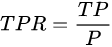
P是真实正样本的个数，
TP是P个正样本中被分类器预测为正样本的个数。

举一个简单的例子方便大家的理解，还是刚才雷达的例子。假设现在有10个雷达信号警报，其中8个是真的轰炸机（P）来了，2个是大鸟（N）飞过，经过某分析员解析雷达的信号，判断出9个信号是轰炸机，剩下1个是大鸟，其中被判定为轰炸机的信号中，有1个其实是大鸟的信号（FP=1），而剩下8个确实是轰炸机信号（TP=8）。因此可以计算出FPR为，TPR为，而就对应ROC曲线上一点。

说到这里，想必大家已经明白这俩个指标的计算方法，再往深挖一点，可以思考一下这俩个指标背后的原理。还是雷达的例子，敏锐的雷达系统我们肯定希望它能把所有的敌方轰炸机来袭都感知到并预测出来，即TPR越高越好，但我们又不希望它把大鸟的飞过也当成轰炸机来预警，即FRP越低越好。因此，大家可以发现，这俩个坐标值其实是有相互制约的一个概念在里面。

当绘制完成曲线后，就会对模型有一个定性的分析，如果要对模型进行量化的分析，此时需要引入一个新的概念，就是AUC（Area under roc Curve）面积，这个概念其实很简单，就是指ROC曲线下的面积大小，而计算AUC值只需要沿着ROC横轴做积分就可以了。真实场景中ROC曲线一般都会在这条直线的上方，所以AUC的取值一般在0.5~1之间。AUC的值越大，说明该模型的性能越好。

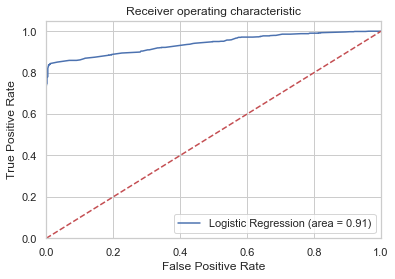

In [36]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

接收者操作特征曲线（ROC）曲线是与二元分类器一起使用的另一种常用工具。 虚线表示纯随机分类器的ROC曲线; 一个好的分类器尽可能远离该线（朝左上角）。

## 学习感悟

通过pandas读取csv文件后，根据不同的分类属性找到影响结果的强预测因子，在根绝RFE利用这些因素处理数据集，进行细分，进一步去掉影响不稳定的因素，最后通过逻辑回归模型训练预测。